In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dat = pd.read_csv('heart1.csv')
dat.shape

(303, 13)

In [ ]:
dat.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,1


In [ ]:
a = [2,3,4]
for idx, i in enumerate(a):
    print(idx, i)

0 2
1 3
2 4


In [ ]:
cat_vars = ['sex','cp','fbs','restecg','exang','slope','ca']
for idx, col in enumerate(cat_vars):
    print(idx, col)

0 sex
1 cp
2 fbs
3 restecg
4 exang
5 slope
6 ca


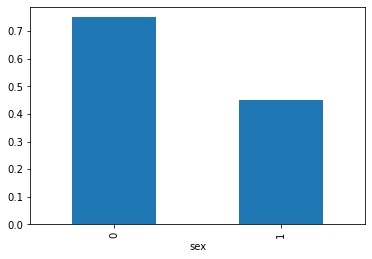

In [ ]:
dat.groupby(['sex'])['target'].mean().plot(kind='bar')

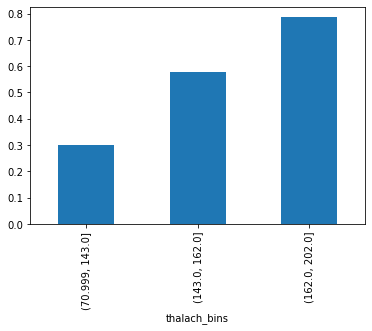

In [ ]:
dat['thalach_bins'] = pd.qcut(dat['thalach'], q=3)
dat.groupby(['thalach_bins'])['target'].mean().plot(kind='bar')

In [ ]:
cat_vars = ['sex','cp','fbs','restecg','exang','slope','ca']
for idx, col in enumerate(cat_vars):
    print(idx, int(idx/3), idx%3)

0 0 0
1 0 1
2 0 2
3 1 0
4 1 1
5 1 2
6 2 0


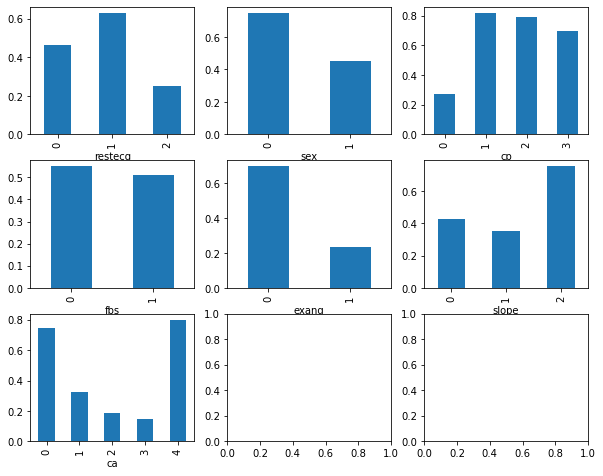

In [ ]:
cat_vars = ['restecg', 'sex','cp','fbs','exang','slope','ca']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10,8))
for idx, col in enumerate(cat_vars):
    pos = axes[int(idx/3), idx%3]
    dat.groupby(col)['target'].mean().plot(kind='bar', ax=pos)

In [ ]:
cat_vars = ['restecg', 'sex','cp','fbs','exang']
for idx, col in enumerate(cat_vars):
    print(idx, int(idx/2), idx%2)

0 0 0
1 0 1
2 1 0
3 1 1
4 2 0


In [ ]:
# cat_vars = ['restecg', 'sex','cp','fbs','exang']
# fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10,6))
# for idx, col in enumerate(cat_vars):
#     pos = axes[int(idx/3), idx%3]
#     dat.groupby(col)['target'].mean().plot(kind='bar', ax=pos)

In [ ]:
dat.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target,thalach_bins
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,"(143.0, 162.0]"
1,37,1,2,130,250,0,1,187,0,3.5,0,0,1,"(162.0, 202.0]"
2,41,0,1,130,204,0,0,172,0,1.4,2,0,1,"(162.0, 202.0]"
3,56,1,1,120,236,0,1,178,0,0.8,2,0,1,"(162.0, 202.0]"
4,57,0,0,120,354,0,1,163,1,0.6,2,0,1,"(162.0, 202.0]"


In [ ]:
a = '20'
print("my score is {}".format(a))

my score is 20


In [ ]:
a = '20'
print(f"my score is {a}")

my score is 20


In [ ]:
num_vars = ['age', 'trestbps','chol','thalach','oldpeak']
for idx, col in enumerate(num_vars):
    #print(col)
    print(col + '_bins')
    #print(f'{col}_bins')

age_bins
trestbps_bins
chol_bins
thalach_bins
oldpeak_bins


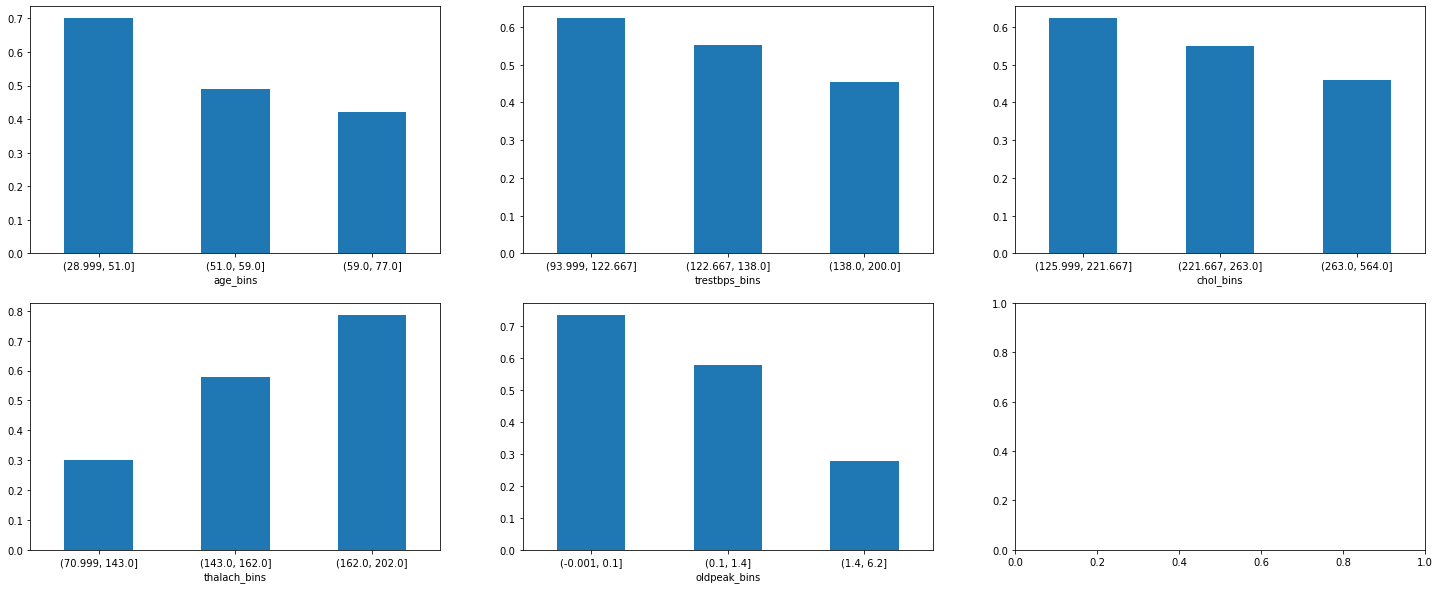

In [ ]:
num_vars = ['age', 'trestbps','chol','thalach','oldpeak']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(25,10))
for idx, col in enumerate(num_vars):
    pos = axes[int(idx/3), idx%3]
    dat[col+'_bins'] = pd.qcut(dat[col], q=3)
    dat.groupby(col+'_bins')['target'].mean().plot(kind='bar', ax=pos, rot=0)

In [ ]:
dat.isnull().sum()

age              0
sex              0
cp               0
trestbps         0
chol             0
fbs              0
restecg          0
thalach          0
exang            0
oldpeak          0
slope            0
ca               0
target           0
thalach_bins     0
age_bins         0
trestbps_bins    0
chol_bins        0
oldpeak_bins     0
dtype: int64

In [ ]:
dat.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'target', 'thalach_bins', 'age_bins',
       'trestbps_bins', 'chol_bins', 'oldpeak_bins'],
      dtype='object')

In [ ]:
# tree based models --> no outlier treat, no standardization is required

X = dat[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca']]

y = dat['target']

X.shape, y.shape

((303, 12), (303,))

In [ ]:
# split --> train test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
x_train.shape, x_test.shape

((212, 12), (91, 12))

In [ ]:
# DECISION TREE
from sklearn.tree import DecisionTreeClassifier
dec_clf = DecisionTreeClassifier(max_depth=3, random_state=12)
dec_clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=12)

In [ ]:
dec_clf.predict(x_test)

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0])

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(dec_clf.predict(x_test), y_test)

0.8035714285714286

In [ ]:
from sklearn.metrics import roc_auc_score, classification_report
print(classification_report(dec_clf.predict(x_test), y_test))

              precision    recall  f1-score   support

           0       0.57      0.83      0.68        30
           1       0.89      0.69      0.78        61

    accuracy                           0.74        91
   macro avg       0.73      0.76      0.73        91
weighted avg       0.79      0.74      0.74        91



In [ ]:
# HYPERPARAMETER

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dtree_clf = DecisionTreeClassifier(random_state = 123)

params = {

    'min_samples_leaf' : [1, 2, 3], # minimum samples to be there in the leaf
    'max_depth': [1, 2, 3, 4] # maximum depth the decisoon tree can have

}

grid = GridSearchCV(estimator = dtree_clf,
             param_grid = params,
             cv = 3, # 3-fold cross-validation
             scoring = 'roc_auc')

grid.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=123),
             param_grid={'max_depth': [1, 2, 3, 4],
                         'min_samples_leaf': [1, 2, 3]},
             scoring='roc_auc')

In [ ]:
grid.cv_results_

{'mean_fit_time': array([0.00849422, 0.00375724, 0.00292428, 0.00299994, 0.00323272,
        0.00273101, 0.00271233, 0.00248973, 0.0028882 , 0.00257532,
        0.00262332, 0.00278195]),
 'std_fit_time': array([5.41045210e-03, 8.86450986e-04, 3.11373346e-04, 6.00492626e-04,
        4.68324291e-04, 2.15139387e-04, 3.42027183e-04, 8.72703917e-05,
        2.83839763e-04, 9.89865653e-05, 6.34877235e-05, 2.83278486e-04]),
 'mean_score_time': array([0.00465218, 0.00291204, 0.00229263, 0.00261998, 0.00222301,
        0.00267903, 0.00241899, 0.00204349, 0.00216142, 0.00237664,
        0.00249076, 0.0021201 ]),
 'std_score_time': array([2.56023153e-03, 4.11001960e-04, 2.76826524e-04, 4.83467301e-04,
        1.28429666e-04, 7.19821591e-04, 1.73896242e-04, 1.30427530e-05,
        9.81316377e-05, 2.56387181e-04, 2.45530471e-04, 4.72110261e-05]),
 'param_max_depth': masked_array(data=[1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4],
              mask=[False, False, False, False, False, False, False, False,
  

In [ ]:
grid.best_params_

{'max_depth': 2, 'min_samples_leaf': 1}

In [ ]:
grid.best_score_

0.7835849186655638

In [ ]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=2, random_state=123)

In [ ]:
x_train.shape

(212, 12)

In [ ]:
x_train.shape[0]*0.67

142.04000000000002

In [ ]:
# random forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf_clf = RandomForestClassifier(random_state=123)

params = {

    'n_estimators' : [100,200], # number of trees
    'max_depth' : [3,5], # max depth of these trees
    'max_samples' : [80, 120 ], # max number of samples for the trees
    'max_features' : [2,3], # max number of features to go into the tree
    'min_samples_leaf' : [3,4], # minimum samples to be there in the leaf
    'min_samples_split' : [8,10], # minimum number of samples to be there split further
    'criterion' : ['gini', 'entropy']

}

grid = GridSearchCV(estimator = rf_clf,
             param_grid = params,
             cv = 3, # 3-fold cross-validation
             scoring = 'roc_auc')

grid.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=123),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [3, 5],
                         'max_features': [2, 3], 'max_samples': [80, 120],
                         'min_samples_leaf': [3, 4],
                         'min_samples_split': [8, 10],
                         'n_estimators': [100, 200]},
             scoring='roc_auc')

In [ ]:
grid.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=5, max_features=3,
                       max_samples=120, min_samples_leaf=3, min_samples_split=8,
                       random_state=123)

In [ ]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 3,
 'max_samples': 120,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [ ]:
grid.best_score_

0.9018610421836227

In [ ]:
roc_auc_score(y_train,  grid.best_estimator_.predict_proba(x_train)[:,1])

0.9685358817165524

In [ ]:
roc_auc_score(y_test,  grid.best_estimator_.predict_proba(x_test)[:,1])

0.8955512572533849